CS524: Introduction to Optimization Lecture 28
======================================

## Michael Ferris<br> Computer Sciences Department <br> University of Wisconsin-Madison

## November 8, 2023
--------------

In [1]:
%load_ext gams.magic
m = gams.exchange_container

# Moving average example

Read in data and plot.
Push data into gams environment.

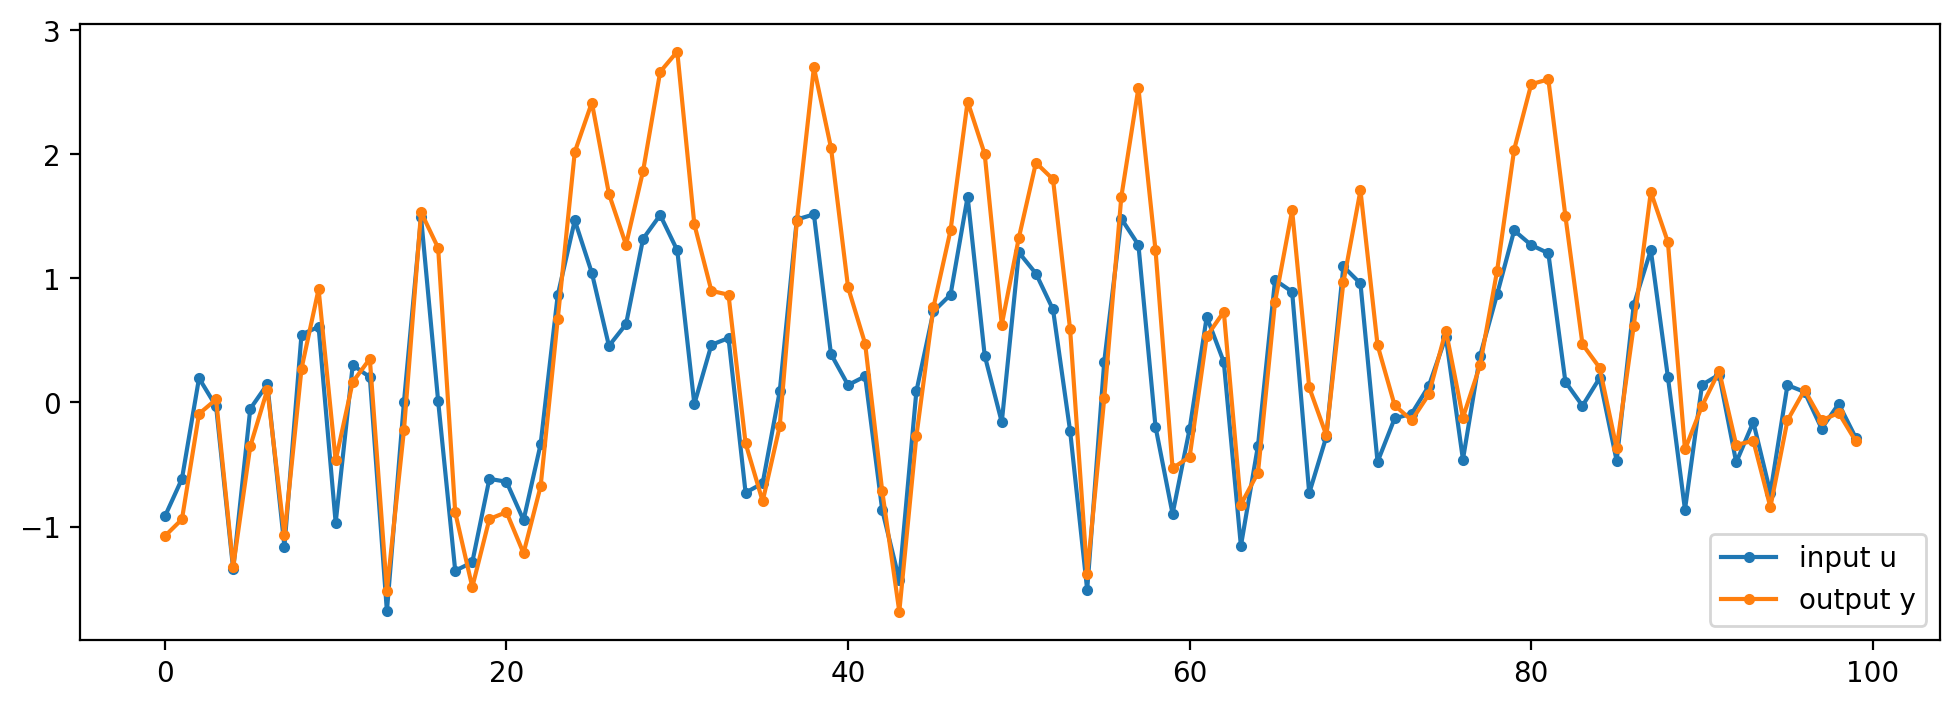

In [2]:
import pandas as pd
# Load the data file (ref: Boyd/263)
raw = pd.read_csv("uy_data.csv",header=None,names=['u','y'])

# push data into gams
t = m.addSet('t',records=["t"+str(x) for x in range(1,len(raw)+1)])
u = m.addParameter('u',[t],records=raw['u'].to_numpy())
y = m.addParameter('y',[t],records=raw['y'].to_numpy())
maxWidth = 40
k = m.addSet('k',records=range(0,maxWidth))
width = m.addParameter('width',records=3)

%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,4));
# plot the u and y data
ax.plot(raw['u'],'.-',raw['y'],'.-')
ax.legend(["input u", "output y"],loc='lower right');

## Moving average model

- A “moving average” model with window size k assumes each output is a weighted combination of k previous inputs:

$$ y_t \approx w_0 u_t + w_1 u_{t-1} + \cdots + w_{k-1} u_{t-(k-1)} \text{  for all $t$} $$

- find weights $w_0,\ldots, w_{k-1}$ that best agree with the data.

- Writing all the equations (e.g. $k=3$):
$$
\begin{bmatrix} y_1 \\ y_2 \\ y_3 \\ \vdots \\ y_T 
\end{bmatrix}
\approx
\begin{bmatrix} u_1 & 0 & 0 \\ u_2 & u_1 & 0 \\ u_3 & u_2 & u_1 \\ \vdots & \vdots & \vdots \\ u_T & u_{T-1} & u_{T-2}
\end{bmatrix}
\begin{bmatrix} w_0 \\ w_1 \\ w_2 
\end{bmatrix}
$$

- Solve least squares problem!

In [3]:
%%gams
set j(k) 'lag set';
variables w(k), obj;
equations defobj;

defobj..
  obj =e= sum(t, sqr(y(t) - sum(j, w(j)*u(t-j.val))));

model ma / defobj /;

j(k) = yes$(k.val lt width);
solve ma using qcp min obj;

parameter yest(t);
yest(t) = sum(j, w.l(j)*u(t-j.val));

,Solver Status,Model Status,Objective,#equ,#var,Model Type,Solver,Solver Time
0,Normal (1),OptimalLocal (2),6.1917,1,4,QCP,CONOPT,0.025


2.488312734522067


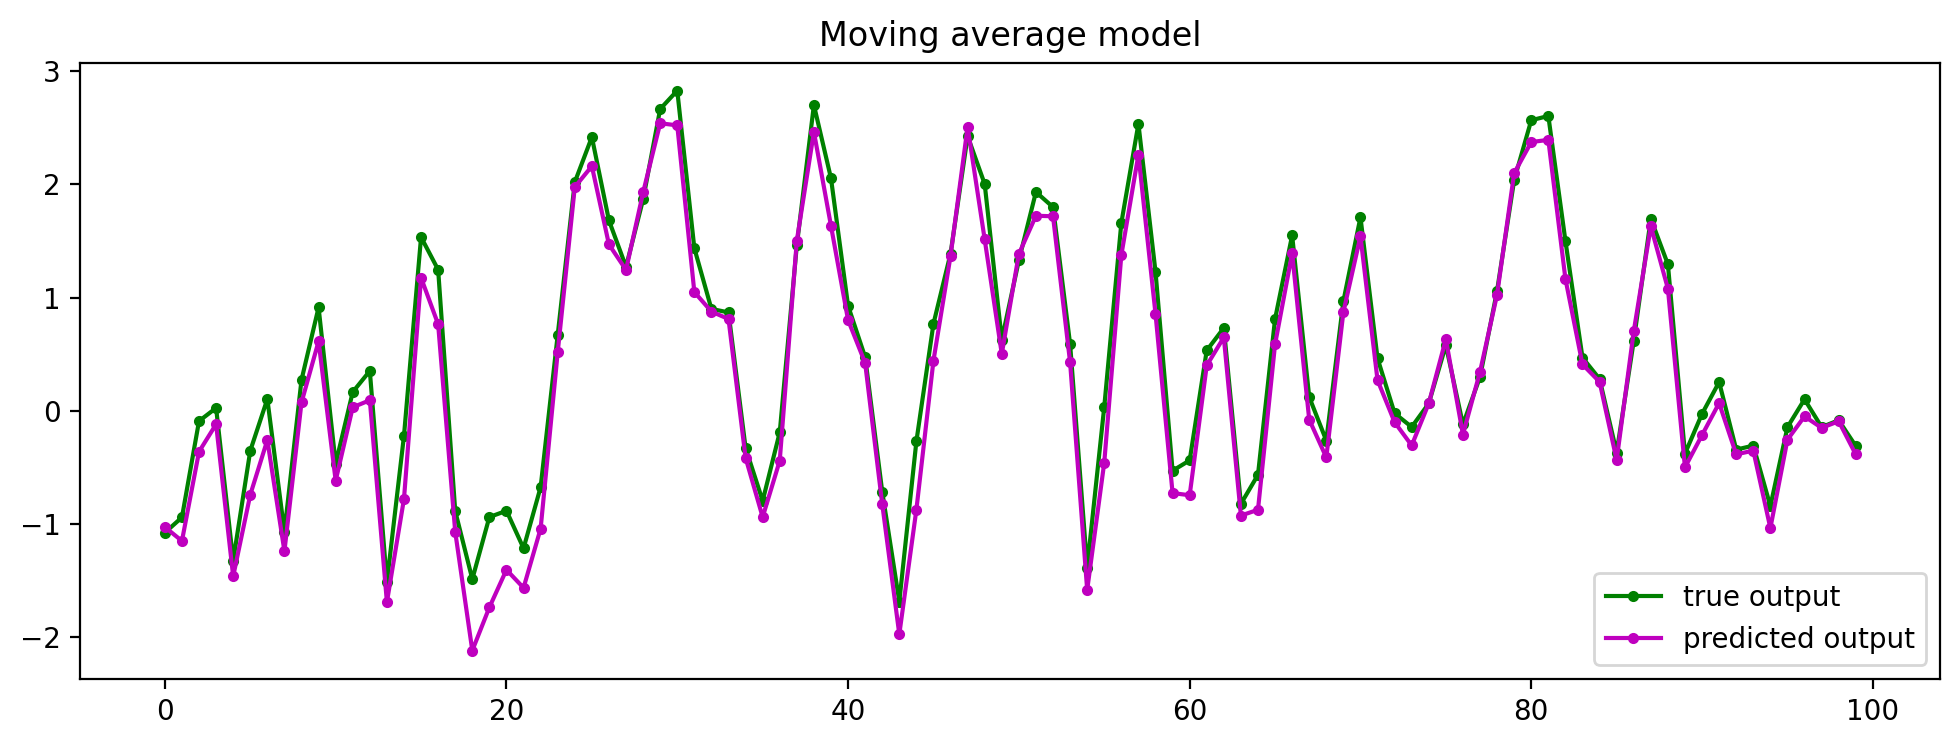

In [4]:
yest = m['yest'].records.value

import numpy as np
print(np.linalg.norm(yest-raw['y']))

fig, ax = plt.subplots(figsize=(12,4))
# plot the yest and y data
ax.plot(raw['y'],'g.-',yest,'m.-')
ax.set_title("Moving average model")
ax.legend(["true output", "predicted output"],loc='lower right');

Now compute errors for each width

In [5]:
%%gams
* compute the error that the moving average model makes
parameter err(k);
for (width = 1 to card(k),
  j(k) = yes$(k.val lt width);
  solve ma using qcp min obj;

  yest(t) = sum(j, w.l(j)*u(t-j.val));
  err(k)$(k.ord = width) = sqrt(sum(t, sqr(y(t)-yest(t))));
);

,Solver Status,Model Status,Objective,#equ,#var,Model Type,Solver,Solver Time
0,Normal (1),OptimalLocal (2),35.2879,1,2,QCP,CONOPT,0.008
1,Normal (1),OptimalLocal (2),10.5626,1,3,QCP,CONOPT,0.006
2,Normal (1),OptimalLocal (2),6.1917,1,4,QCP,CONOPT,0.007
3,Normal (1),OptimalLocal (2),6.0566,1,5,QCP,CONOPT,0.008
4,Normal (1),OptimalLocal (2),6.0558,1,6,QCP,CONOPT,0.008
5,Normal (1),OptimalLocal (2),6.0541,1,7,QCP,CONOPT,0.007
6,Normal (1),OptimalLocal (2),5.9707,1,8,QCP,CONOPT,0.007
7,Normal (1),OptimalLocal (2),5.8178,1,9,QCP,CONOPT,0.008
8,Normal (1),OptimalLocal (2),5.8030,1,10,QCP,CONOPT,0.008
9,Normal (1),OptimalLocal (2),5.7984,1,11,QCP,CONOPT,0.01


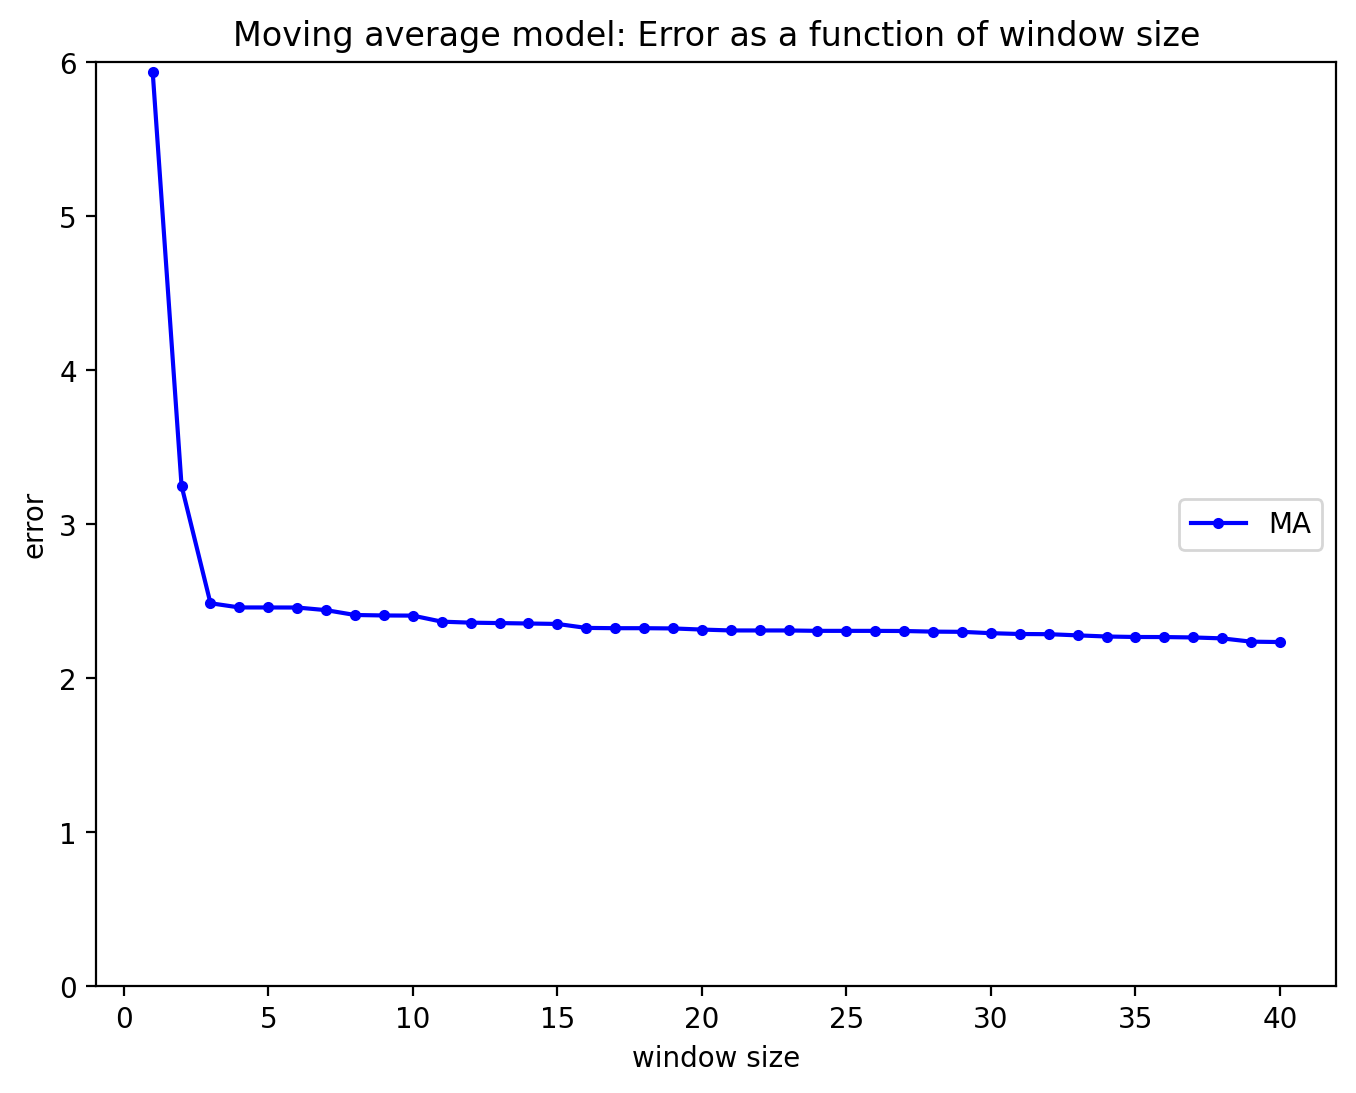

In [6]:
resid = m['err'].records.value

fig, ax = plt.subplots(figsize=(8,6))
ax.set_title("Moving average model: Error as a function of window size")
ax.set_xlabel("window size")
ax.set_ylabel("error")
# add 1 to k so plot for k=1 to maxWidth
ax.plot(range(1,maxWidth+1),resid,"b.-")
ax.legend(["MA"],loc="right",fontsize=10)
ax.set_ylim([0,6]);

In [7]:
%gams_cleanup --closedown